# Initial data exploration
---
## 1. Osservazione generale dei due dataset del progetto:
- *ninja_weather_country_ES_merra_2_land_area_weighted.csv* (contenente dati meteorologici della Spagna dal 1980 al 2019)
- *energy_datasetSpain.csv* (contenente dati relativi alla generazione e al consumo dell'energia in Spagna dal 2015 al 2018)

In [1]:
# System
# ================================
import os

# Data manipulation
# ================================
import pandas as pd
import numpy as np
import re

# Plots
# ================================
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Data exploration
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

---
### 1.1 Dataset relativo al meteo
**ninja_weather_country_ES_merra_2_land_area_weighted.csv**

In [2]:
df_weather = pd.read_csv("../data/raw/ninja_weather_country_ES_merra_2_land_area_weighted.csv", sep=";")
df_weather

,time,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
0,01/01/1980 00:00,1034,694,0,0,167,2207,7848,11637
1,01/01/1980 01:00,1396,6938,0,0,3,2445,8117,11638
2,01/01/1980 02:00,184,6964,0,0,347,2773,824,11639
3,01/01/1980 03:00,1693,6985,0,0,375,3141,8116,11637
4,01/01/1980 04:00,141,6969,0,0,283,3472,7945,11635
...,...,...,...,...,...,...,...,...,...
350635,31/12/2019 19:00,0,6609,0,0,0,0,128,11742
350636,31/12/2019 20:00,"0,0001",6057,0,0,0,0,1317,11762
350637,31/12/2019 21:00,"0,0004",5569,0,0,0,0,1249,11777
350638,31/12/2019 22:00,"0,0004",5192,0,0,0,0,1179,11789


In [3]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   time                350640 non-null  object
 1   precipitation       350640 non-null  object
 2   temperature         350640 non-null  int64 
 3   irradiance_surface  350640 non-null  int64 
 4   irradiance_toa      350640 non-null  int64 
 5   snowfall            350640 non-null  object
 6   snow_mass           350640 non-null  int64 
 7   cloud_cover         350640 non-null  int64 
 8   air_density         350640 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 24.1+ MB


##### Il formato delle colonne non è adeguato:
- **time** dovrebbe essere di tipo *date* e tutte le altre di tipo float.
- Inoltre tutti i valori devono essere divisi per 1000.
- Le colonne **precipitation** e **snowfall** presentano la *virgola* al posto del *punto* per indicare numeri con decimali quindi dovranno essere adeguate alle altre.

In [4]:
for col in df_weather: print(col, df_weather[col].isna().sum())  # 0 Na

time 0
precipitation 0
temperature 0
irradiance_surface 0
irradiance_toa 0
snowfall 0
snow_mass 0
cloud_cover 0
air_density 0


---
### 1.2 Dataset relativo all'energia
**energy_datasetSpain.csv**

In [5]:
df_energy = pd.read_csv("../data/raw/energy_datasetSpain.csv")
df_energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [6]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

Anche quì il formato della colonna time non è corretto

In [7]:
for col in df_energy: print(col, df_energy[col].isnull().sum())

time 0
generation biomass 19
generation fossil brown coal/lignite 18
generation fossil coal-derived gas 18
generation fossil gas 18
generation fossil hard coal 18
generation fossil oil 19
generation fossil oil shale 18
generation fossil peat 18
generation geothermal 18
generation hydro pumped storage aggregated 35064
generation hydro pumped storage consumption 19
generation hydro run-of-river and poundage 19
generation hydro water reservoir 18
generation marine 19
generation nuclear 17
generation other 18
generation other renewable 18
generation solar 18
generation waste 19
generation wind offshore 18
generation wind onshore 18
forecast solar day ahead 0
forecast wind offshore eday ahead 35064
forecast wind onshore day ahead 0
total load forecast 0
total load actual 36
price day ahead 0
price actual 0


#### Le seguenti colonne contengono solo valori *NaN*:
- *generation hydro pumped storage aggregated*
- *forecast wind offshore eday ahead*

#### Le seguenti colonne contengono solo valori *0*:
- *generation fossil coal-derived gas*
- *generation fossil oil shale*
- *generation fossil peat*
- *generation geothermal*
- *generation marine*
- *generation wind offshore*

Quindi decido di eliminarle

In [8]:
df_energy.drop(["generation fossil coal-derived gas",
                "generation fossil oil shale",
                "generation fossil peat",
                "generation geothermal",
                "generation hydro pumped storage aggregated",
                "generation marine",
                "generation wind offshore",
                "forecast wind offshore eday ahead"], axis=1, inplace=True)

In [9]:
for col in df_energy: print(col, df_energy[col].isnull().sum())
print(f"\nTot NaN: {sum([df_energy[col].isnull().sum() for col in df_energy])}")

time 0
generation biomass 19
generation fossil brown coal/lignite 18
generation fossil gas 18
generation fossil hard coal 18
generation fossil oil 19
generation hydro pumped storage consumption 19
generation hydro run-of-river and poundage 19
generation hydro water reservoir 18
generation nuclear 17
generation other 18
generation other renewable 18
generation solar 18
generation waste 19
generation wind onshore 18
forecast solar day ahead 0
forecast wind onshore day ahead 0
total load forecast 0
total load actual 36
price day ahead 0
price actual 0

Tot NaN: 292


Come possiamo vedere restano ancora degli Na da gestire
I dati seguono un andamento temporale quindi preferisco sostituire i **nan** con un interpolazione lineare piuttosto che con la media

### Tutte le modifiche sui dataset quali:
- Gestione NaN
- Eliminazione colonne
- Formattazione tipo delle colonne
- Gestione virgole tra i valori delle colonne **precipitation** e **snowfall**
- Merge dei due dataset tramite la colonna in comune **time**

Vengono fatte tramite il file make_dataset.py

---
---
## 2. Importazione, pulizia e merge dei due dataset tramite il file *make_dataset.py*
# aggiungere descrizione del passaggio fatto nella cella quì sotto

In [10]:
py_path = re.sub(r"\\", "/", os.environ["PYTHONPATH"])
make_dataset = py_path + "/Forecasting_Repository/src/data/make_dataset.py"
raw_energy_data = py_path + "/Forecasting_Repository/data/raw/energy_datasetSpain.csv"
raw_weather_data = py_path + "/Forecasting_Repository//data/raw/ninja_weather_country_ES_merra_2_land_area_weighted.csv"
cleaned_data_path = py_path + "/Forecasting_Repository/data/processed/processed_data.csv"

In [11]:
%run {make_dataset} {raw_energy_data} {raw_weather_data} {cleaned_data_path}

Exception: File `'C:/Users/KY662AT/PycharmProjects/Energy_demand_forecastingT/Forecasting_Repository/src/data/make_dataset.py'` not found.

In [12]:
df = pd.read_csv(py_path + "/Forecasting_Repository/data/processed/processed_data.csv", index_col="time")
df

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,price actual,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density,Holidays
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,65.41,1.000000e-07,0.451,0.0,0.0,0.0,2.781,0.0868,11.948,1
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,64.92,2.000000e-07,0.234,0.0,0.0,0.0,2.781,0.1135,11.957,1
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,64.48,2.000000e-07,0.129,0.0,0.0,0.0,2.781,0.0127,11.965,1
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,59.32,2.000000e-07,0.008,0.0,0.0,0.0,0.278,0.1154,11.971,1
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,56.04,1.000000e-07,0.042,0.0,0.0,0.0,0.278,0.0984,11.978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,...,77.02,0.000000e+00,6.908,0.0,0.0,0.0,0.000,0.0305,11.669,0
2018-12-31 20:00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,...,76.16,0.000000e+00,6.164,0.0,0.0,0.0,0.000,0.0338,11.692,0
2018-12-31 21:00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,...,74.30,0.000000e+00,5.575,0.0,0.0,0.0,0.000,0.0408,1.171,0


In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other                     

In [15]:
def count_occurrences(*reference):
    for y in reference:
        print(f'{y} occurrences: {len([h for h in df.index.hour[df.index.year == y]])}')
    return


count_occurrences(2015, 2016, 2017, 2018)

2015 occurrences: 8760
2016 occurrences: 8784
2017 occurrences: 8760
2018 occurrences: 8760


Il 2016 ha più osservazioni perché è bisestile

---
#### 2.1 **Intera time series per la domanda energetica**

<AxesSubplot:xlabel='time'>

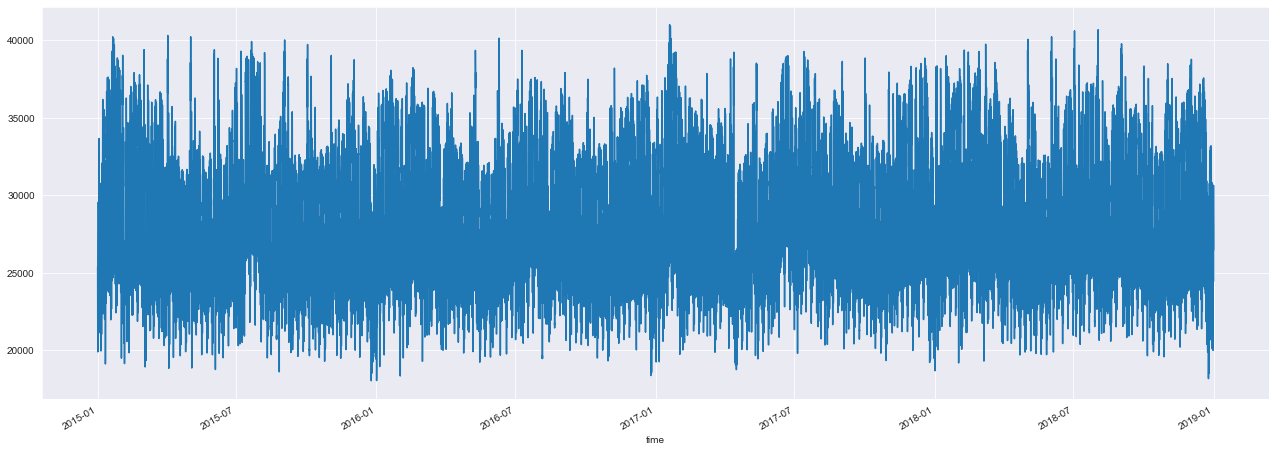

In [16]:
fig, ax = plt.subplots(figsize=(22, 8))
df["total load actual"].plot()

##### **Zoom sul 2016**

<AxesSubplot:xlabel='time'>

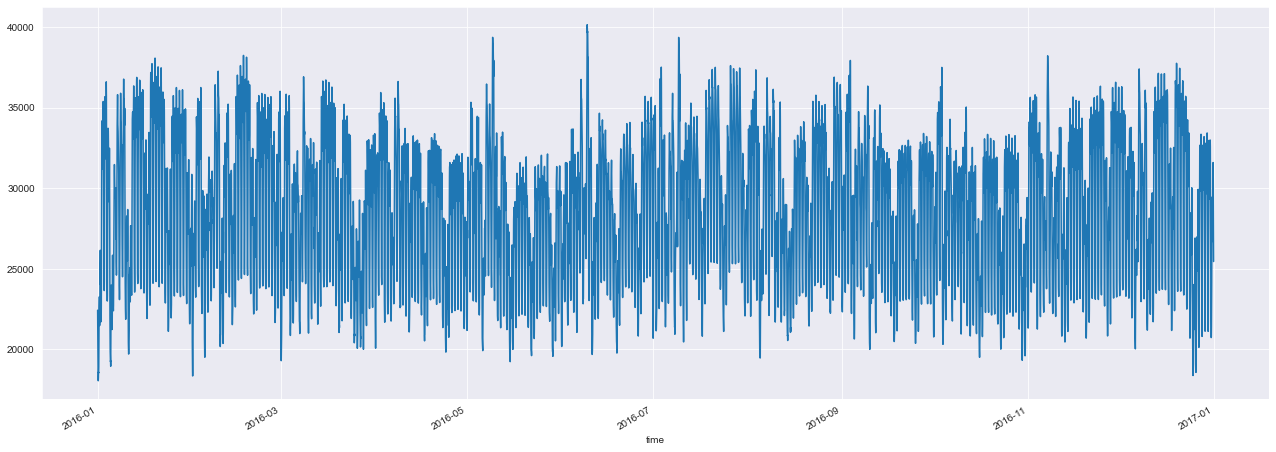

In [17]:
fig, ax = plt.subplots(figsize=(22, 8))
df["total load actual"][df.index.year == 2016].plot()

Sembra esserci una stagionalità settimanale

Text(0.5, 0.98, '')

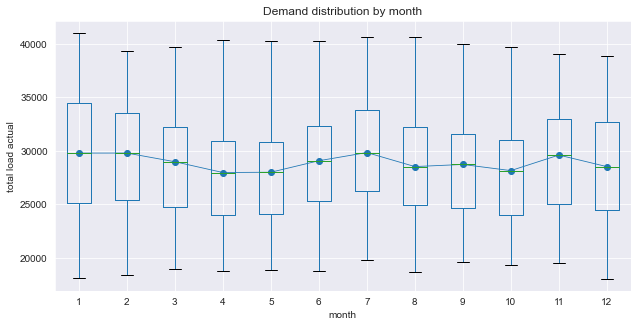

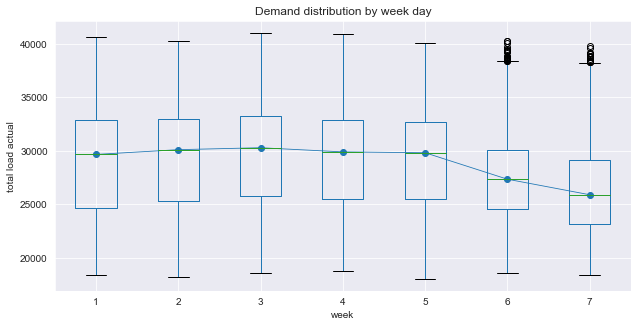

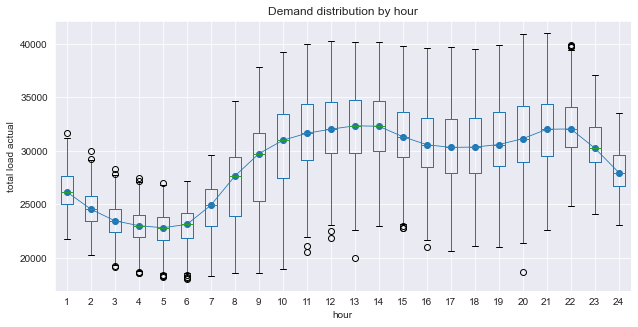

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
df['month'] = df.index.month
df.boxplot(column='total load actual', by='month', ax=ax)
df.groupby('month')["total load actual"].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('total load actual')
ax.set_title('Demand distribution by month')
fig.suptitle('')

fig, ax = plt.subplots(figsize=(10, 5))
df['week'] = df.index.day_of_week + 1
df.boxplot(column='total load actual', by='week', ax=ax)
df.groupby('week')["total load actual"].median().plot(style='-o', linewidth=0.8, ax=ax)
ax.set_ylabel('total load actual')
ax.set_title('Demand distribution by week day')
fig.suptitle('')

fig, ax = plt.subplots(figsize=(10, 5))
df['hour'] = df.index.hour + 1
df.boxplot(column='total load actual', by='hour', ax=ax)
df.groupby('hour')["total load actual"].median().plot(style='-o', linewidth=0.8, ax=ax)
ax.set_ylabel('total load actual')
ax.set_title('Demand distribution by hour')
fig.suptitle('')

---
---
## 3. Identificazione di possibili trend

<AxesSubplot:>

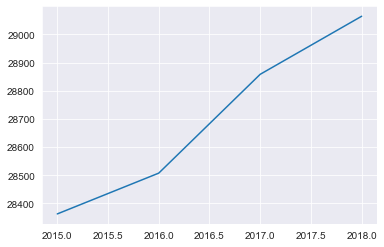

In [19]:
Ymean_demand = []
for i in df.index.year.unique():
    Ymean_demand.append(np.mean(df["total load actual"][df.index.year == i]))

sn.lineplot(y=Ymean_demand, x=[2015, 2016, 2017, 2018])

**Sembra esserci un leggero trend; data l'entità dei valori nel grafico potremmo però sbagliarci**

---
### 3.1 Test per la stazionarietà
Facciamo una verifica più approfondita tramite il *Augmented Dickey-Fuller* test (ADF)

In [20]:
stationary_test = adfuller(df["total load actual"], autolag="AIC")

In [21]:
print(f"ADF Test Statistic: {stationary_test[0]}")  # ADF Test Statistic
print(f"P-Value: {stationary_test[1]}")  # P-Value
print(f"Lags Used: {stationary_test[2]}")  # Lags Used
print(f"Observations Used ADF: {stationary_test[3]}")  # Observations Used ADF

ADF Test Statistic: -21.42031575696062
P-Value: 0.0
Lags Used: 52
Observations Used ADF: 35011


##### Dai valori riportati (in particolar modo dal p-value) possiamo rifiutare l'ipotesi nulla e quindi confermare la presenza di stazionarietà.
# spiegare l'utilità della ricerca di stazionarietà --> relativa agli errori
---

---
### 3.2 Scomposizione STL
Identificazione Stagionalità, Trend e Rumore

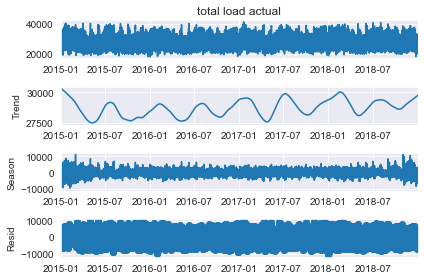

In [36]:
stl = STL(df["total load actual"], period=1460)  # quattro anni in giorni
res = stl.fit()
fig = res.plot()

L'STL su questi dati è molto pesante. Si consiglia di non far partire il codice della cella di sopra. L'immagine del grafico fatto con una precisione relativa ai giorni è salvato in Forecasting_Repository/src/visualization
**Dai risultati sembra esserci un trend particolare ogni 4 mesi.**  NON SEMBRA IN REALTA'

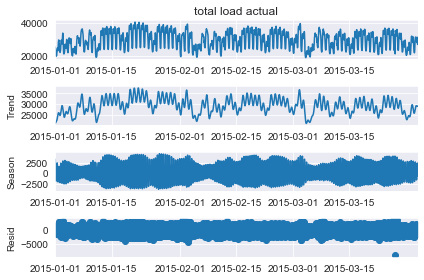

In [35]:
stl = STL(df["total load actual"][(df.index.year == 2015) &
                                  (df.index.month <= 3)], period=12)  # 28 è il numero di settimane in sette mesi
res = stl.fit()
fig = res.plot()

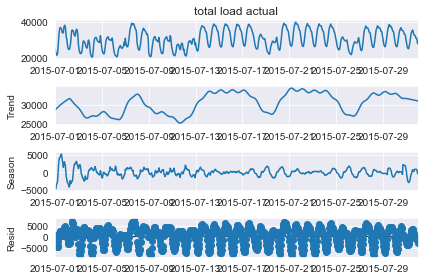

In [34]:
stl = STL(df["total load actual"][(df.index.year == 2015) &
                                  (df.index.month == 7)], period=31)  # 31 è il numero di giorni
res = stl.fit()
fig = res.plot()

---
### 3.3 ACF e PACF

C:\Users\KY662AT\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


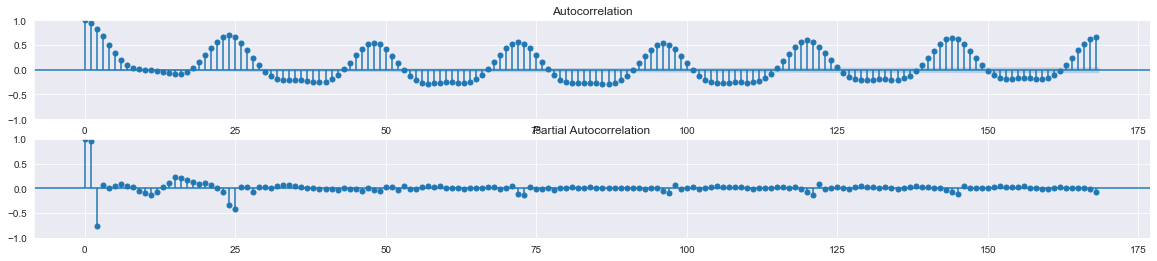

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(20, 4))
plot_acf(df["total load actual"], ax=ax[0], lags=168)  # 168h = 1 settimana
plot_pacf(df["total load actual"], ax=ax[1], lags=168)
plt.show()

Come possiamo vedere la domanda di energia dipende dal valore che la stessa assume nelle ore precedenti a quella dell'osservazione.
?Le osservazioni sono correlate ai loro ritardi come mostra l' ACF e il PACF?(Decidere se lasciarlo o meno)
Correlazione a breve termine fino al lag 2 poi una al lag 24/25 --> quindi stagionalità giornaliera (m = 24).

In [ ]:
for i in df.columns[20:]:
    print(i, df["total load actual"].corr(df[i]))

# Osservazione andamento delle possibili variabili esogene

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
df["precipitation"][(df.index.year == 2017) & (df.index.month == 12)].plot(title="PRECIPITATION", ax=ax)

fig, ax = plt.subplots(figsize=(15, 5))
df["temperature"][(df.index.year == 2017) & (df.index.month == 12)].plot(title="TEMPERATURE", ax=ax)

fig, ax = plt.subplots(figsize=(15, 5))
df["irradiance_surface"][(df.index.year == 2017) & (df.index.month == 12)].plot(title="irradiance_surface", ax=ax)

fig, ax = plt.subplots(figsize=(15, 5))
df["irradiance_toa"][(df.index.year == 2017) & (df.index.month == 12)].plot(title="irradiance_toa", ax=ax)

## Chiarire: Se c'è stazionarietà perché c'è una stagionalità settimanale?

In [ ]:
for i in df["month"]:
    print(np.mean(df["total load actual"][df["month"] == i]))# mean_month =